<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# K-Means Clustering

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

-   Use scikit-learn's K-Means Clustering to cluster data


## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

-   Customer segmentation
-   Understand what the visitors of a website are trying to accomplish
-   Pattern recognition
-   Machine learning
-   Data compression

In this notebook we practice k-means clustering with 2 examples:

-   k-means on a random generated dataset
-   Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <li><a href="#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Pre-processing</a></li>
                <li><a href="#modeling">Modeling</a></li>
                <li><a href="#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


### Import libraries

Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [55]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>
Lets create our own dataset for this lab!


First we need to set up a random seed. Use <b>numpy's "random.seed()" </b> function, where the seed will be set to <b>0</b>.\
This command will not create the dataset itself because that demands a list of attributes to be performed correctly (below).\
Here, on the other hand, a condition to create the dataset is put into motion and its very nature is to be randomic rather than any particular mathematical definition.

In [56]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the *make_blobs* class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <ul> <li> n_samples = 5000 as defined above. </li> </ul> 
    <ul> <li> n_features = 2, in order to use a scatterplot to visualize the data distribution (age and income for example). </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> n_samples = 5000 as defined above. </li> </ul> 
    <ul> <li> The integer labels for cluster membership of each sample, that is,  where "Cluster Number..." will be displayed.. </li> </ul>
</ul>


In [57]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [58]:
print(X)
print()
print(X.shape)
print()
print("The X Matrix displays 2 colums because it is a 2D (scatter-plot) example, like X=income and Y=age.")

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]

(5000, 2)

The X Matrix displays 2 colums because it is a 2D (scatter-plot) example, like X=income and Y=age.


Display the scatter plot of the randomly generated data.


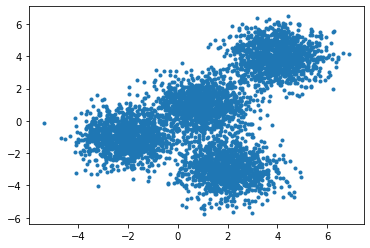

In [59]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans Class with these parameters, where the output parameter is called <b>k_means, which is an instance-object of K-Means  Class. </b>.


In [60]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>\
</p> Let's take a brief moment to understand the next command. So far, the matrix X is only a bunch of data that can be used (or not) to several analysis. If X is not connected or assigned to an instance-object which in its turn is defined to a certain Class, nothing meaningful will emerge. So, it is essential "to link" these two ends in order to produce some results:


#### Make no Mistake => The Clustering Model will be created by the next command line. After 12 iterations "starting" with the "randomly" choosen 4 centroids, four different clusters named "0,1,2,3" will be defined and storaged in variable y (Response Vector).\
As this is an introductory exercise, the 4 centroids' centers won't differ too much from the initial kick-off values (alpha).

In [61]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now let's grab the labels for each point in the model using KMeans    <b> ".labels\_ "</b> attribute and save it as <b> k_means_labels </b> 

In [62]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [63]:
k_means_labels.shape

(5000,)

In [64]:
print(y)
print(type(y))
print()

[1 2 2 ... 0 1 1]
<class 'numpy.ndarray'>



In [65]:
#quick test to verify how big the labels can be. If necessary, run till range(5000) 

for i in range(20):
    if y[i] > 3:
        print("No")
    else:
        print("Position:", i, "Label or Cluster:", y[i])

Position: 0 Label or Cluster: 1
Position: 1 Label or Cluster: 2
Position: 2 Label or Cluster: 2
Position: 3 Label or Cluster: 1
Position: 4 Label or Cluster: 0
Position: 5 Label or Cluster: 2
Position: 6 Label or Cluster: 2
Position: 7 Label or Cluster: 3
Position: 8 Label or Cluster: 0
Position: 9 Label or Cluster: 3
Position: 10 Label or Cluster: 2
Position: 11 Label or Cluster: 2
Position: 12 Label or Cluster: 2
Position: 13 Label or Cluster: 3
Position: 14 Label or Cluster: 2
Position: 15 Label or Cluster: 1
Position: 16 Label or Cluster: 1
Position: 17 Label or Cluster: 0
Position: 18 Label or Cluster: 0
Position: 19 Label or Cluster: 2


(alpha) We will also get the coordinates of the cluster centers using KMeans     <b> ".cluster_centers\_" </b> and save it as <b> k_means_cluster_centers </b>


In [66]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see how it looks like!


Please read through the code and comments to understand how to plot the model.


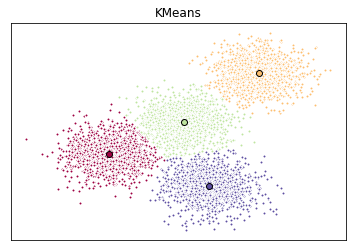

In [67]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3 (k_means_labels), which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Practice

Try to cluster the above dataset into 3 clusters.  
Notice: do not generate data again, use the same dataset as above.


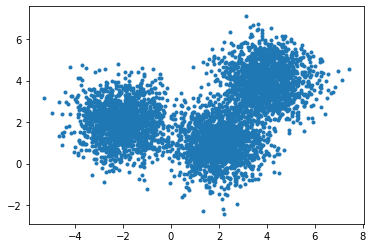

In [83]:
# write your code here

X3, y3 = make_blobs(n_samples=5000, centers=[[4,4], [-2, 2], [2, 1]], cluster_std=0.9)

plt.scatter(X3[:, 0], X3[:, 1], marker='.')

In [84]:
print(X3)
print()
print(X3.shape)

[[-2.30639863  1.98624865]
 [-2.37287094  2.18117241]
 [ 2.65539328  0.7729057 ]
 ...
 [-1.99550914  2.30787565]
 [-2.52895338  1.06282171]
 [ 4.10358665  3.4460706 ]]

(5000, 2)


In [85]:
from sklearn.cluster import KMeans

In [86]:
k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

k_means3.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
k_means_labels3 = k_means.labels_
k_means_labels3

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [88]:
print(y3)

[1 1 2 ... 1 1 0]


In [89]:
#quick test to verify how big the labels can be. If necessary, run till range(5000) 

for i in range(20):
    if y3[i] > 2:
        print("No")
    else:
        print("Position:", i, "Label or Cluster:", y3[i])

Position: 0 Label or Cluster: 1
Position: 1 Label or Cluster: 1
Position: 2 Label or Cluster: 2
Position: 3 Label or Cluster: 1
Position: 4 Label or Cluster: 0
Position: 5 Label or Cluster: 0
Position: 6 Label or Cluster: 0
Position: 7 Label or Cluster: 0
Position: 8 Label or Cluster: 1
Position: 9 Label or Cluster: 1
Position: 10 Label or Cluster: 2
Position: 11 Label or Cluster: 0
Position: 12 Label or Cluster: 1
Position: 13 Label or Cluster: 1
Position: 14 Label or Cluster: 1
Position: 15 Label or Cluster: 1
Position: 16 Label or Cluster: 1
Position: 17 Label or Cluster: 0
Position: 18 Label or Cluster: 2
Position: 19 Label or Cluster: 1


(alpha) Again.....

In [90]:
k_means_cluster_centers3 = k_means3.cluster_centers_
k_means_cluster_centers3

array([[ 2.03032344,  0.94015549],
       [-2.03952254,  2.02630785],
       [ 3.98493753,  3.9897468 ]])

Plotting the Results:

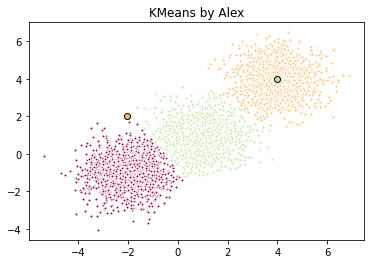

In [91]:
# Initialize the plot with the specified dimensions.
figur = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels3))))

# Create a plot
ax=figur.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-2 (k_means_labels), which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, 2], [2, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members3 = (k_means_labels3 == k)
    
    # Define the centroid, or cluster center.
    cluster_center3 = k_means_cluster_centers3[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members3, 0], X[my_members3, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center3[0], cluster_center3[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans by Alex')

# Remove x-axis ticks
#ax.set_xticks(())

# Remove y-axis ticks
#ax.set_yticks(())

# Show the plot
plt.show()


Conclusion: After running the KMeans method several times (with 6 and 12 iterations), not a single good Clusterization was found.

Double-click **here** for the solution.

<!-- Your answer is below:

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


-->


<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

Lets download the dataset. To download the data, we will use **`!wget`** to download it from IBM Object Storage.  
**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


In [128]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-10-28 20:13:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.02s   

2020-10-28 20:13:19 (1.71 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



### Load Data From CSV File

Before you can work with the data, you must use the URL to get the Cust_Segmentation.csv.


In [129]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [130]:
cust_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [131]:
cust_df.shape

(850, 10)

<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. As we know, k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.\
</p> Remember that "axis=1" refers to a column and "axis=0" refers to a row.

In [132]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalizing over the standard deviation

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [133]:
from sklearn.preprocessing import StandardScaler

#this line will eliminate column "Customer Id" as it sweeps all rows but starting sweeping columns from 1 (not 0).

X = df.values[:,1:]    
print("Here X is type:", type(X))
print()

#this line will change any "nan" value to a number as KMeans works only with numerical values + transform pandas format to a numpy array

X = np.nan_to_num(X)   
print("Now X is type:", type(X))
print()

print(X)
print()
print("The Shape for former Dataset, current Feature Matrix X is", X.shape)
print()

Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

Here X is type: <class 'numpy.ndarray'>

Now X is type: <class 'numpy.ndarray'>

[[41.     2.     6.    ...  1.073  0.     6.3  ]
 [47.     1.    26.    ...  8.218  0.    12.8  ]
 [33.     2.    10.    ...  5.802  1.    20.9  ]
 ...
 [25.     4.     0.    ...  3.21   1.    33.4  ]
 [32.     1.    12.    ...  0.696  0.     2.9  ]
 [52.     1.    16.    ...  3.638  0.     8.6  ]]

The Shape for former Dataset, current Feature Matrix X is (850, 8)



array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>


If we didn't have access to the k-means algorithm, the task in our hands would be pretty much "Guessing" to which segment each customer  with certain age, income, education, etc would belong after running countless tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels. Let´s get started with k=3 (three centroids).

In [134]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

# next line is very important as model definition X assignment. X is a 850x8 matrix (850 points each one with 8 different features)
# it means that lots of distances calculations will be performed (850x3=2550) on an 8D space.

k_means.fit(X)

labels = k_means.labels_
print()
print(labels)
print()
print(labels.shape)
print()
print(type(labels))


[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0

<h2 id="insights">Insights</h2>
We assign the labels to each row in dataframe.


In [135]:
df["Cluster"] = labels
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
5,6,40,1,23,81,0.998,7.831,NaN,10.9,2
6,7,38,2,4,56,0.442,0.454,0.0,1.6,0
7,8,42,3,0,64,0.279,3.945,0.0,6.6,2
8,9,26,1,5,18,0.575,2.215,NaN,15.5,0
9,10,47,3,23,115,0.653,3.947,0.0,4.0,2


We can easily check the centroid values by averaging the features in each cluster.


In [136]:
df.groupby('Cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Now, Business Owners know not only how many of their Clients are in each of the 3 defined Clusters but also their "average" Traits.

Now, lets look at the distribution of customers based on their age and income:


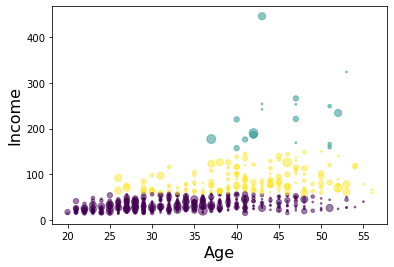

In [137]:
# Some Comments here: 
# 1) area is defined as a circle area to bring proportion to "Edu" parameter
# 2) X is the 850x8 matriz (nparray) where [0] indicates Age and [3] indicates Income (check it out above when normalizing the dataset).

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)

plt.show()

**Conclusion:** Few Premium Customers in this Business Data Base

Alex´s Extra Effort => Let me try another visualization ( Income x DebtCard) (3 and 4)

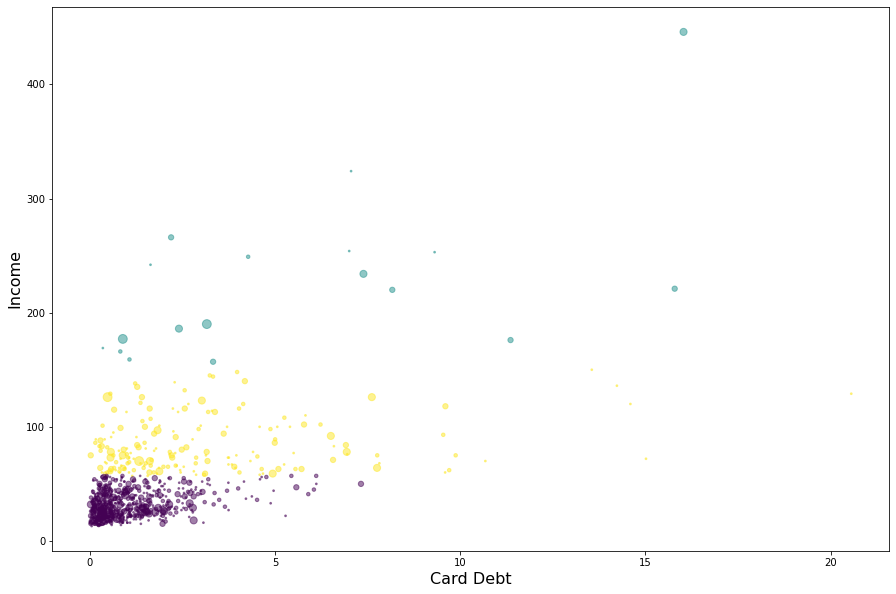

In [144]:
# Some Comments here: 
# 1) area is defined as a circle area to bring proportion to "Edu" parameter
# 2) X is the 850x8 matriz (nparray) where [3] indicates Income and [4] indicates Card Debt.

fig = plt.figure(figsize=(15,10))
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 4], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Card Debt', fontsize=16)
plt.ylabel('Income', fontsize=16)

plt.show()

**Conclusion:** The Business Data Base shows that regardless of which Cluster Clients are, their debts are not too big when compared to their respective Income. It is hard to make any observation of how their level of education is correlated to their debts. 

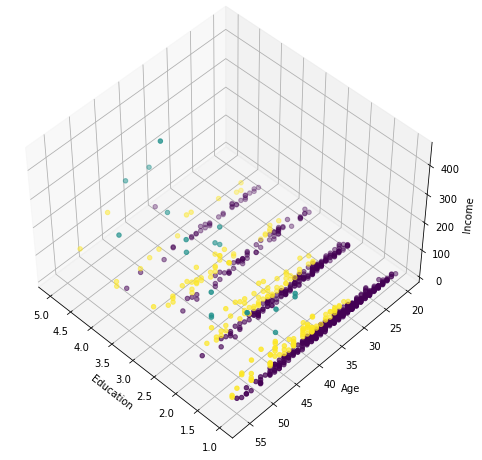

In [145]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED (1)
-   MIDDLE AGED AND MIDDLE INCOME   (2)
-   YOUNG AND LOW INCOME            (0)


**Alex´s Extra Effort.**

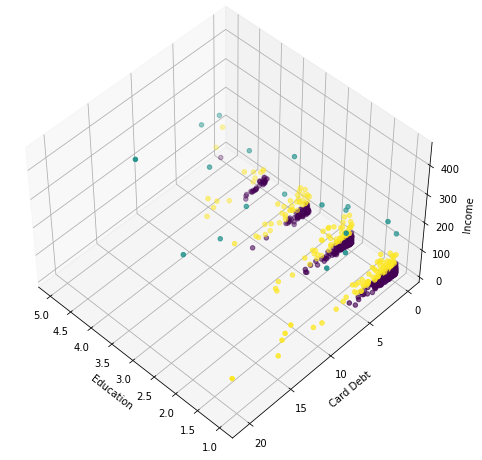

In [147]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Card Debt', fontsize=16)
# plt.xlabel('Education', fontsize=16)
# plt.zlabel('Income', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Card Debt')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 4], X[:, 3], c= labels.astype(np.float))

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |
|                   |         |            |                                    |
|                   |         |            |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
